<center><h1> Exploratory Data Analysis</h1></center>

<img src='../references/banner.png'>

That is the second jupyter notebook of this project. To run this properly, download the data on kaggle [here](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis), save it on ./data/raw and run the previous jupyter notebook (this jupyter notebook will generate a temporary file that will be used in this analysis).

In this Exploratory Data Analysis (EDA), we are going to explore the data and get some insights. We will make questions about the data to understand better how we can help the grocery to improve sells and understand the customers.

Let's get started and explore the data.

<i>Import the libraries </i>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme('whitegrid')
sns.set_style('white')

# Defining constants
FIRST_FIG = 0
SECOND_FIG = 1
THIRD_FIG = 2
SUBTITLE_COLOR = "#656565"

<i>Load the data</i>

In [2]:
data = pd.read_pickle('../data/interim/01_initial_cleaning.pkl')

<i>Check if it was loaded correctly.</i>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-nul

Everything seems ok, the datatypes are correct and all values are non-null.

I will make some questions trying to help improve the grocery's customer understanding:
#### Part 1 - understanding each variable
1. How many customers per age groups do we have in this dataset?
2. What is the mean and median customers age?
3. How many customers per education level?
4. What is the customers'average and median income?
5. How many children per customers?
6. How much of each product does the grocery sell?
7. Which promotions was most sucessful?
8. How many responses?

Also, we can try to look at correlations among attributes:
#### Part 2 - Looking for correlations
1. Income vs TotalSpent
2. Income vs Education, Children, familysize
3. TotalSpent vs Education, children, familysize

### Part 1 - Understanding each variable

In [4]:
# Creating age groups
def group_ages(age):
    if age < 20:
        return 18
    elif age < 30:
        return 20
    elif age < 40:
        return 30
    elif age < 50:
        return 40
    elif age < 60:
        return 50
    elif age < 70:
        return 60
    return 70

data['group_age'] = data['Age'].apply(group_ages)

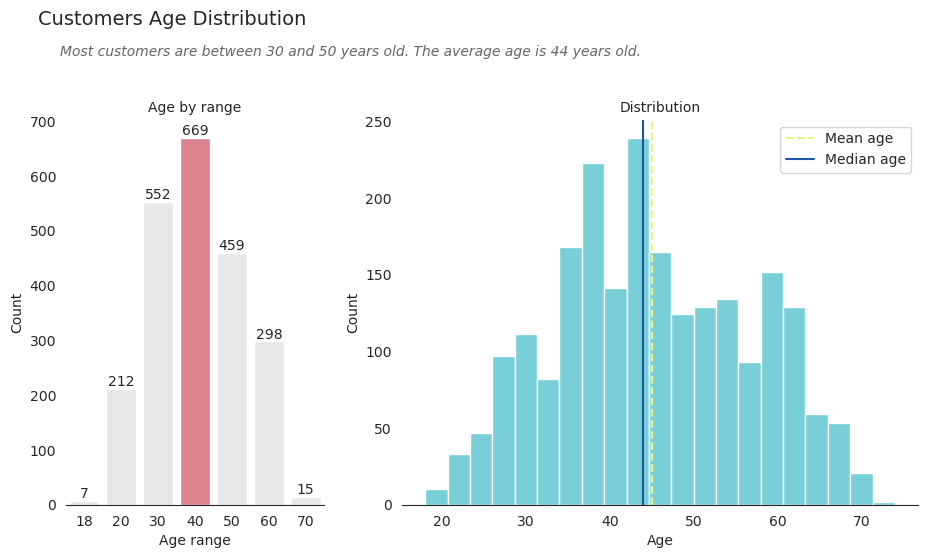

In [5]:
# Variables
colors = ['#E8E8E8',
          '#E8E8E8', 
          '#E8E8E8', 
          '#EB7383', 
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8']
title = 'Customers Age Distribution'
subtitle = 'Most customers are between 30 and 50 years old. The average age is 44 years old.'

# Create subplots
fig, ax = plt.subplots(nrows=1, 
                       ncols=2, 
                       figsize=(11, 5), 
                       gridspec_kw={'width_ratios': [1, 2]})

# Bar plot
sns.countplot(data=data, 
              x='group_age', 
              ax=ax[FIRST_FIG], 
              palette=colors)
ax[FIRST_FIG].bar_label(ax[FIRST_FIG].containers[0])
ax[FIRST_FIG].set_title(label='Age by range', 
                        fontsize=10)
ax[FIRST_FIG].set(xlabel='Age range',
                  ylabel='Count')

# Histogram
sns.histplot(data=data, 
             x='Age', 
             ax=ax[SECOND_FIG], 
             color='#4BBFCC')

mean_age = data['Age'].mean() # calc mean age
median_age = data['Age'].median() # calc median age

ax[SECOND_FIG].set(xlabel='Age',
                   ylabel='Count')
ax[SECOND_FIG].set_title(label='Distribution',
                         fontsize=10)
ax[SECOND_FIG].axvline(mean_age, 
                       color='#EBF383', 
                       ls="--", 
                       label="Mean age") #line mean age
ax[SECOND_FIG].axvline(median_age, 
                       color="#1E589E", 
                       ls="-", 
                       label="Median age") # line median age
# ax[SECOND_FIG].xlabel('hi')
ax[SECOND_FIG].legend()

sns.despine(left=True)

# title
fig.suptitle(title,
             x=0.1, 
             y=1.1, 
             horizontalalignment='left', 
             verticalalignment='top', 
             fontsize=14)

fig.text(0.12, 
         1.03, 
         subtitle, 
         horizontalalignment='left', 
         verticalalignment='top', 
         color=SUBTITLE_COLOR,
         fontstyle="italic", 
         fontsize = 10)
print()

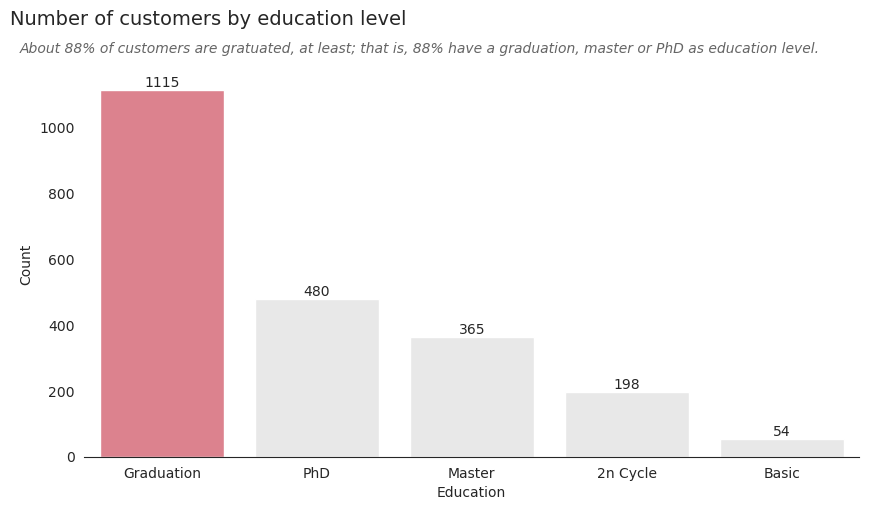

In [6]:
# Set figure size
plt.figure(figsize=(10, 5))

# variabels
colors = ['#EB7383',
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8']
title = "Number of customers by education level"
subtitle = 'About 88% of customers are gratuated, at least; that is,\
 88% have a graduation, master or PhD as education level.'
label_order = ['Graduation',
               'PhD',
               'Master',
               '2n Cycle',
                'Basic']

# plot figure
fig = sns.countplot(data=data, 
                    x='Education', 
                    palette=colors,
                    order=label_order)

# Setting up layout
fig.set(ylabel='Count')
fig.bar_label(fig.containers[0])
plt.title(title, 
          x=0.16,
          y=1.1,
          fontsize=14)
plt.suptitle(subtitle,  
         color=SUBTITLE_COLOR,
         x=0.46,
         y=0.94,
         fontstyle="italic",
         fontsize = 10)

sns.despine(left=True)

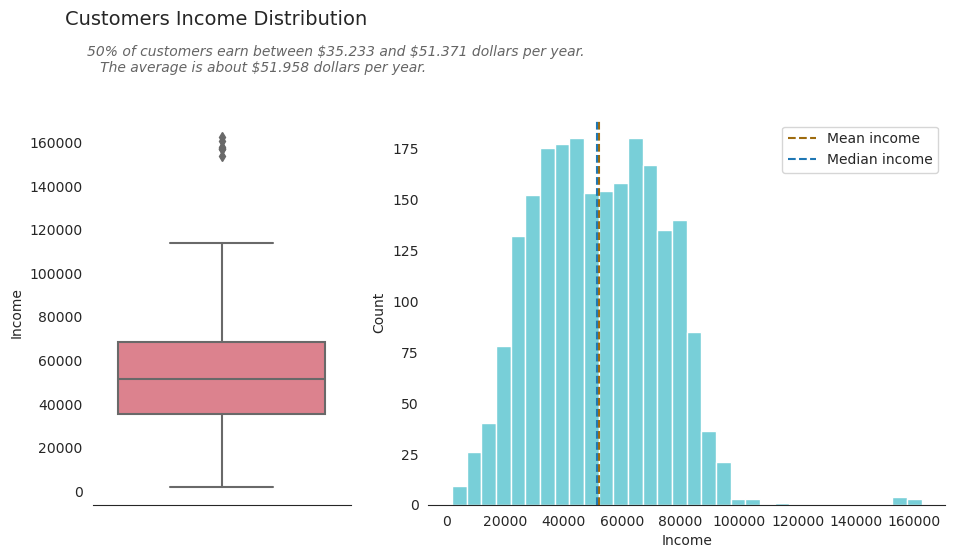

In [7]:
# Creating subplots
fig, ax = plt.subplots(nrows=1, 
                       ncols=2,
                       figsize=(11, 5), 
                       gridspec_kw={'width_ratios': [1, 2]})
#variabls
mean_income = data['Income'].mean()
median_income = data['Income'].median()
title = 'Customers Income Distribution'
subtitle = '50% of customers earn between \$35.233 and \$51.371 dollars per year.\
 \n   The average is about \$51.958 dollars per year.'

# Plot boxplot
ax2 = sns.boxplot(data=data,
                  y='Income',
                  ax=ax[0],
                  color='#EB7383')
# ax2.axhline(mean_income, # plot line mean income
#             color='#9E6B0E', 
#             ls="--", 
#             label="Mean income")
# Plot histogram
ax1 = sns.histplot(data=data, 
             x='Income', 
             color='#4BBFCC',
             ax=ax[1])
ax1.axvline(mean_income, # plot line mean income
            color='#9E6B0E', 
            ls="--", 
            label="Mean income")
ax1.axvline(median_income, # plot line mean age
            ls="--", 
            label="Median income") 
ax1.legend()

# setting up figure
fig.suptitle(title,
             x=0.1, 
             y=1.1, 
             horizontalalignment='left', 
             verticalalignment='top', 
             fontsize=14)

fig.text(0.12, 
         1.03, 
         subtitle, 
         horizontalalignment='left', 
         verticalalignment='top', 
         color=SUBTITLE_COLOR,
         fontstyle="italic", 
         fontsize = 10)


sns.despine(left=True)

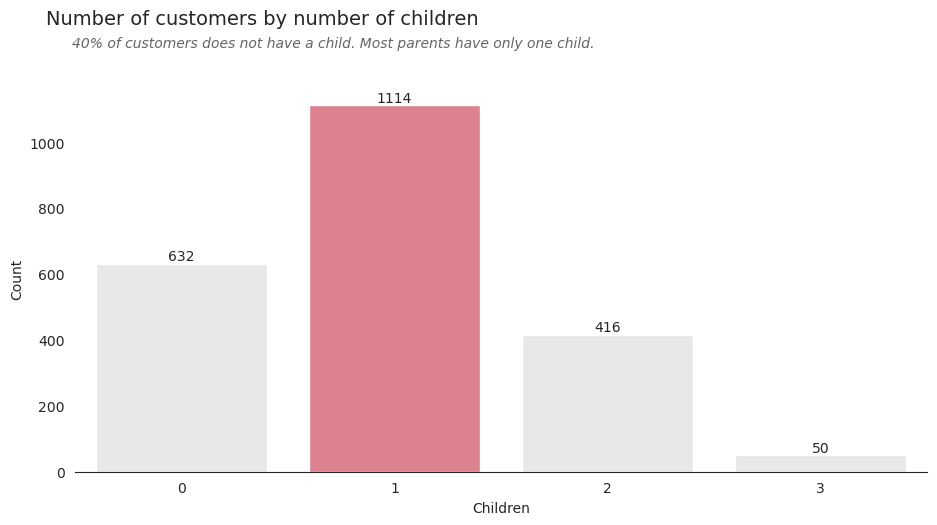

In [8]:
# set figure size
plt.figure(figsize=(11,5))

# variables
colors = ['#E8E8E8', 
          '#EB7383',
          '#E8E8E8', 
          '#E8E8E8']
title = 'Number of customers by number of children'
subtitle = '40% of customers does not have a child. Most parents have only one child.'

# Plot bar figure
fig = sns.countplot(data=data, 
                    x='Children',
                    palette=colors)

# Setting up figure
fig.bar_label(fig.containers[0])
fig.set(ylabel='Count')
plt.title(label=title,
          x=0.22,
          y=1.14,
          fontsize=14)
plt.suptitle(subtitle,  
         color="#656565",
         x=0.36,
         y=0.98,
         fontstyle="italic",
         fontsize = 10)
sns.despine(left=True)

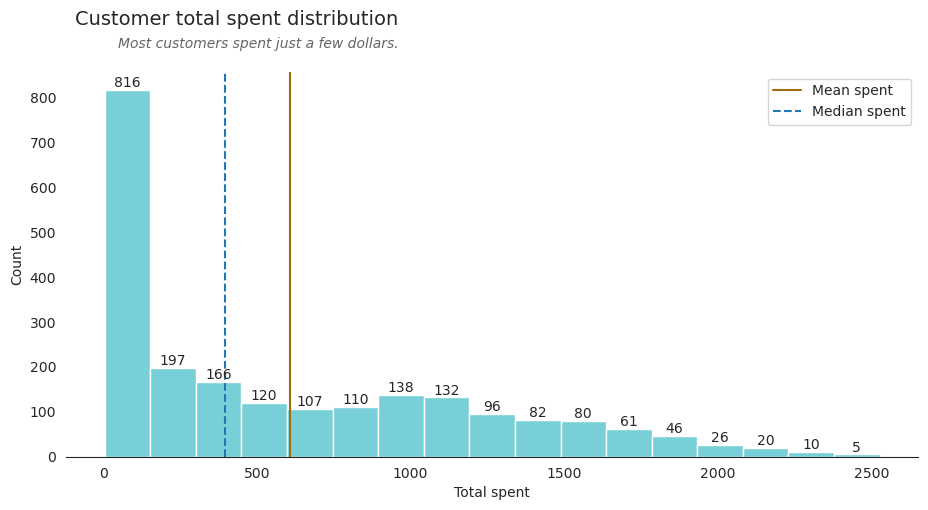

In [9]:
# Set figure size
plt.figure(figsize=(11, 5))

# Variables
colors = ['#E8E8E8', 
          '#51cedb',
          '#E8E8E8', 
          '#E8E8E8']
title = 'Customer total spent distribution'
subtitle = 'Most customers spent just a few dollars.'
mean_income = data['TotalSpent'].mean()
median_income = data['TotalSpent'].median()

# Plot figure
fig = sns.histplot(data=data, 
                   x='TotalSpent',
                   color='#4BBFCC')
fig.axvline(mean_income, # plot line mean income
            color='#9E6B0E', 
            ls="-", 
            label="Mean spent")
fig.axvline(median_income, # plot line mean age
            ls="--", 
            label="Median spent")
fig.bar_label(fig.containers[0])

# Setting up figure
fig.set(xlabel='Total spent')
plt.title(label=title,
          x=0.2,
          y=1.1,
          fontsize=14)
plt.suptitle(subtitle,  
         color="#656565",
         x=0.3,
         y=0.95,
         fontstyle="italic",
         fontsize = 10)
fig.legend()

sns.despine(left=True)

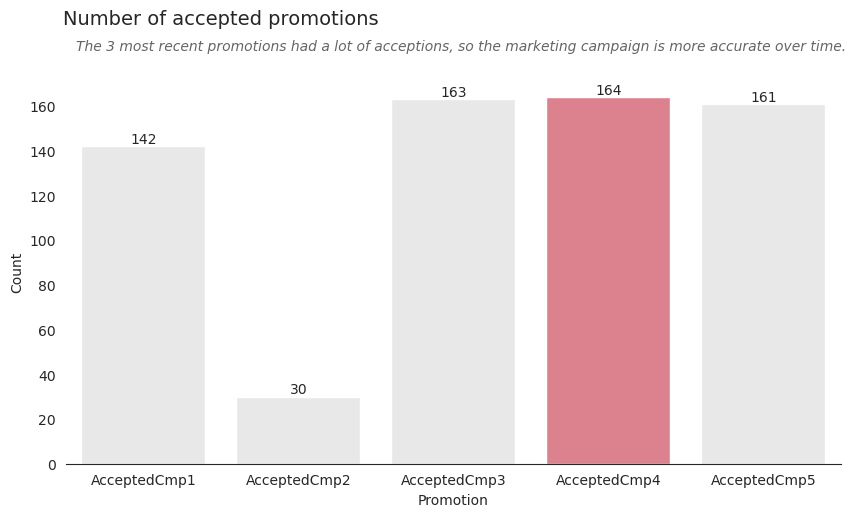

In [10]:
# Figure size
plt.figure(figsize=(10, 5))

# Variables
colors = ['#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8',
          '#EB7383',
          '#E8E8E8']
title = 'Number of accepted promotions'
subtitle = 'The 3 most recent promotions had a lot of acceptions, so the marketing campaign is more accurate\
 over time.'
columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
promotions = pd.DataFrame(data[columns].sum())

# Plot figure
fig = sns.barplot(data=promotions, 
            y=0, 
            x=promotions.index,
            palette=colors)

# Setting up figure
fig.bar_label(fig.containers[0])
plt.title(label=title,
          x=0.2,
          y=1.12,
          fontsize=14)
plt.suptitle(subtitle,  
             color=SUBTITLE_COLOR,
             x=0.52,
             y=0.96,
             fontstyle="italic",
             fontsize = 10)
fig.set(ylabel='Count',
        xlabel='Promotion')

sns.despine(left=True)

### Part 2 - Looking for correlations

##### Income vs TotalSpent

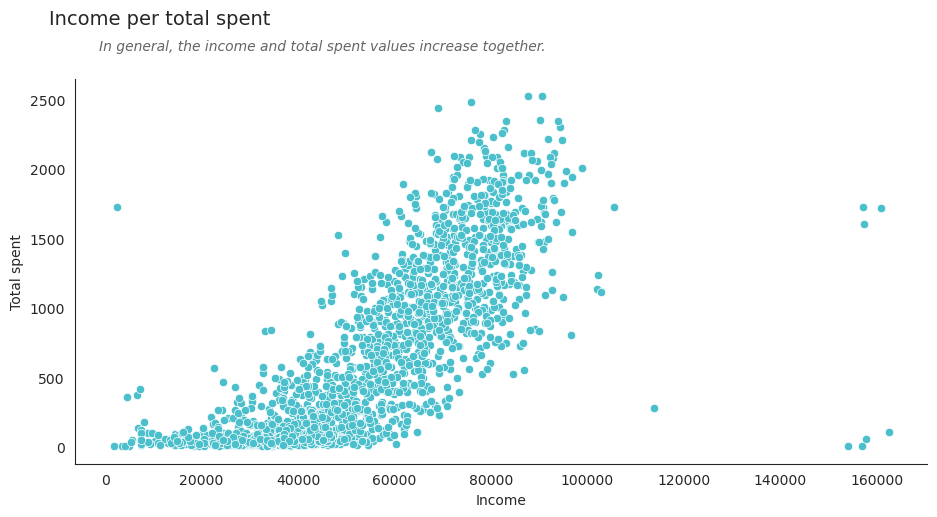

In [11]:
# Set figure size
plt.figure(figsize=(11, 5))

# Variables
title = 'Income per total spent'
subtitle = 'In general, the income and total spent values increase together.'

# Plot scatterplot
fig = sns.scatterplot(data=data,
                x='Income',
                y='TotalSpent',
                color='#4BBFCC')

# Setting up figure
plt.title(label=title,
          x=0.1,
          y=1.12,
          fontsize=14)
plt.suptitle(subtitle,  
             color=SUBTITLE_COLOR,
             x=0.35,
             y=0.96,
             fontstyle="italic",
             fontsize = 10)
fig.set(ylabel='Total spent',
        xlabel='Income')

sns.despine()

##### Income

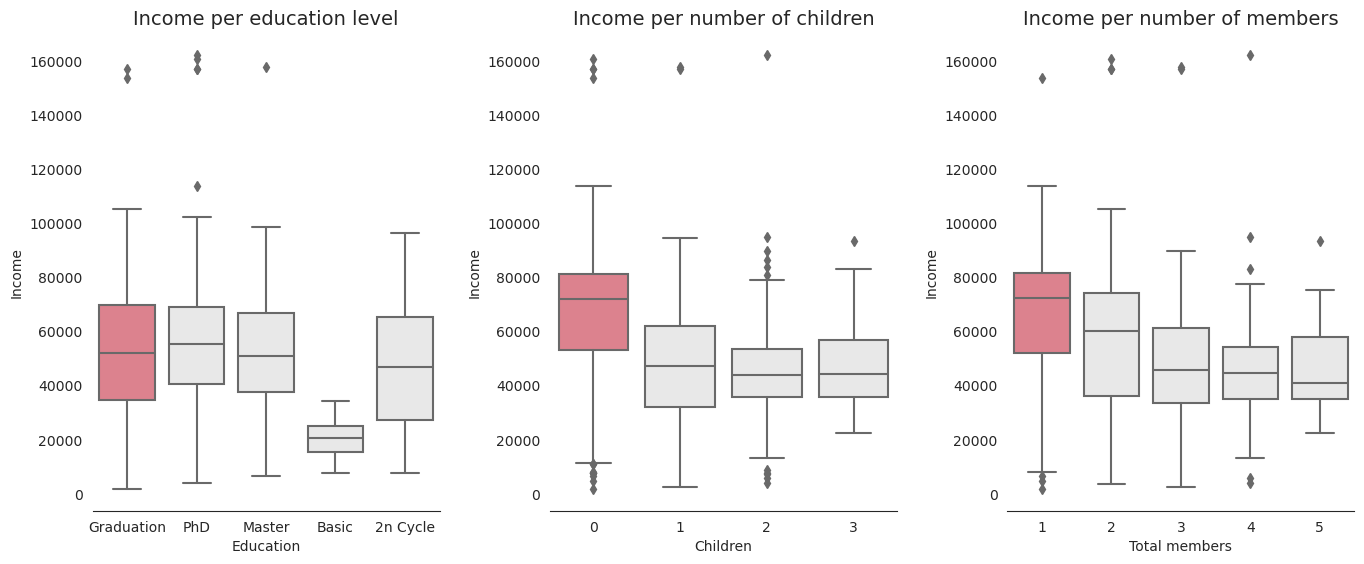

In [12]:
# Variables
colors_graph_1 = ['#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_2 = ['#EB7383', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_3 = ['#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

fig, ax = plt.subplots(nrows=1, 
                       ncols=3, 
                       figsize=(14, 6))
# income vs Education
sns.boxplot(data=data, 
            x='Education', 
            y='Income', 
            ax=ax[FIRST_FIG], 
            palette=colors_graph_1)
ax[FIRST_FIG].set_title(label='Income per education level',
                        fontsize=14)

# Income vs Children
sns.boxplot(data=data, 
            x='Children', 
            y='Income', 
            ax=ax[SECOND_FIG],
            palette=colors_graph_2)
ax[SECOND_FIG].set_title(label='Income per number of children',
                        fontsize=14)

# ax[1].xaxis.label.set_fontsize(18)

# 
sns.boxplot(data=data, 
            x='TotalMembers', 
            y='Income', 
            ax=ax[THIRD_FIG],
            palette=colors_graph_3)
ax[THIRD_FIG].set_title(label='Income per number of members',
                        fontsize=14)
ax[THIRD_FIG].set(xlabel='Total members')


sns.despine(left=True)

fig.tight_layout(pad=2.0)

##### TotalSpent

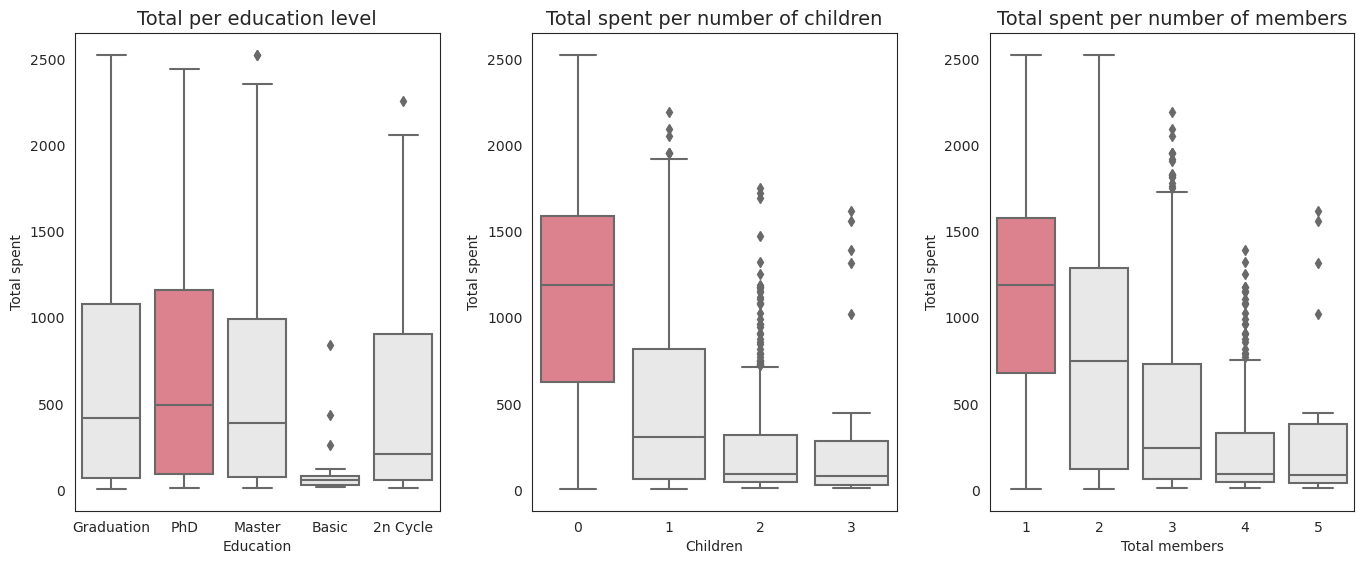

In [13]:
# Variables
colors_graph_1 = ['#E8E8E8',
                  '#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_2 = ['#EB7383', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_3 = ['#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

# Creating figure
fig, ax = plt.subplots(nrows=1, 
                       ncols=3, 
                       figsize=(14, 6))
# Plot Income vs Education
sns.boxplot(data=data, 
            x='Education', 
            y='TotalSpent', 
            ax=ax[FIRST_FIG],
            palette=colors_graph_1)
ax[FIRST_FIG].set_title(label='Total per education level',
                        fontsize=14)
ax[FIRST_FIG].set(ylabel='Total spent')

# Plot Income vs Children
sns.boxplot(data=data, 
            x='Children', 
            y='TotalSpent', 
            ax=ax[SECOND_FIG],
            palette=colors_graph_2)
ax[SECOND_FIG].set_title(label='Total spent per number of children',
                        fontsize=14)
ax[SECOND_FIG].set(ylabel='Total spent')

# Plot Income vs TotalMembers
sns.boxplot(data=data, 
            x='TotalMembers', 
            y='TotalSpent', 
            ax=ax[THIRD_FIG],
            palette=colors_graph_3)
ax[THIRD_FIG].set_title(label='Total spent per number of members',
                        fontsize=14)
ax[THIRD_FIG].set(ylabel='Total spent',
                  xlabel='Total members')

fig.tight_layout(pad=2.0)

In [21]:
# matrix correlation
# Finish conclusions
# Write text among figures

Text(0.5, 1.0, 'Heatmap')

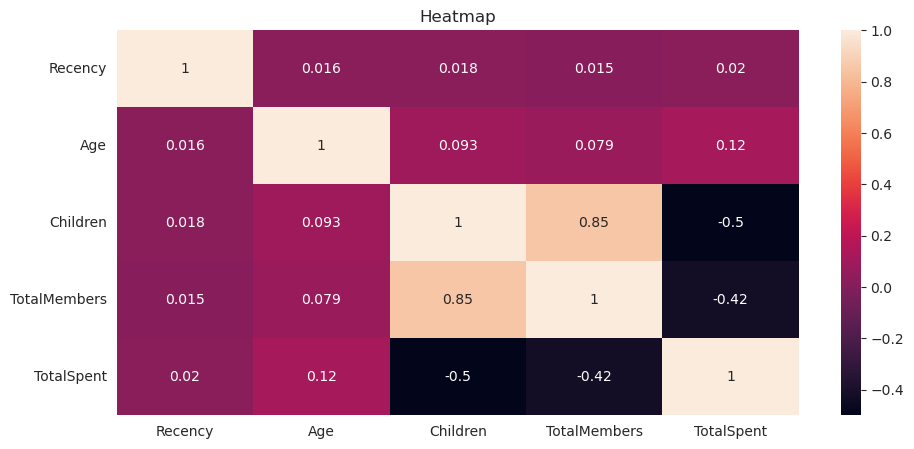

In [22]:
cols = ['Recency', 'Age', 'Children', 'TotalMembers', 'TotalSpent']
corr = data[cols].corr()

plt.figure(figsize=(11, 5))
sns.heatmap(corr, annot=True)
plt.title('Heatmap')